In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras._tf_keras.keras.models import Sequential,load_model
from keras._tf_keras.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras._tf_keras.keras.preprocessing import image

In [18]:
img_height, img_width = 28, 28
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)
num_classes = len(train_generator.class_indices)
print(f"Number of classes (letters): {num_classes}")

Found 8389 images belonging to 63 classes.
Found 1444 images belonging to 63 classes.
Number of classes (letters): 63


In [19]:

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax'),
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 63)             │        32,319 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,039 (746.25 KB)

 Trainable params: 191,039 (746.25 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.0940 - loss: 3.5287 - val_accuracy: 0.3899 - val_loss: 1.6480
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4269 - loss: 1.5616 - val_accuracy: 0.5256 - val_loss: 1.2007
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5460 - loss: 1.1462 - val_accuracy: 0.5388 - val_loss: 1.0798
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5975 - loss: 0.9902 - val_accuracy: 0.5949 - val_loss: 0.9556
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6502 - loss: 0.8588 - val_accuracy: 0.6087 - val_loss: 0.9108
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6685 - loss: 0.7949 - val_accuracy: 0.6219 - val_loss: 0.9012
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6903 - loss: 0.7352 - val_accuracy: 0.6434 - val_loss: 0.8369
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7223 - loss: 0.6792 - val_accuracy: 0.655

In [22]:
model.save('bry_cnn_letter_recognizer_model.h5')

In [56]:

img_path = 'test letter.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
labels = list(train_generator.class_indices.keys())
predicted_letter = labels[predicted_class_index]

print(f"Predicted Letter: {predicted_letter}")

top_indices = prediction[0].argsort()[-5:][::-1]
for i in top_indices:
    print(f"{labels[i]}: {prediction[0][i]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Letter: bo_bu
bo_bu: 0.8570
ba: 0.0783
b: 0.0626
w: 0.0014
g: 0.0003


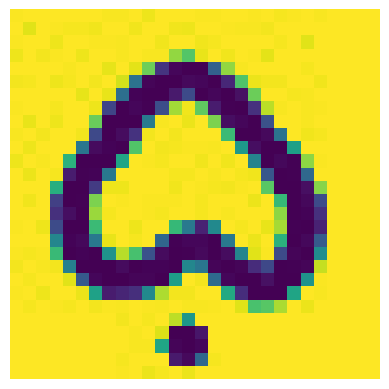

In [57]:
plt.imshow(img)
plt.axis('off')
plt.show()

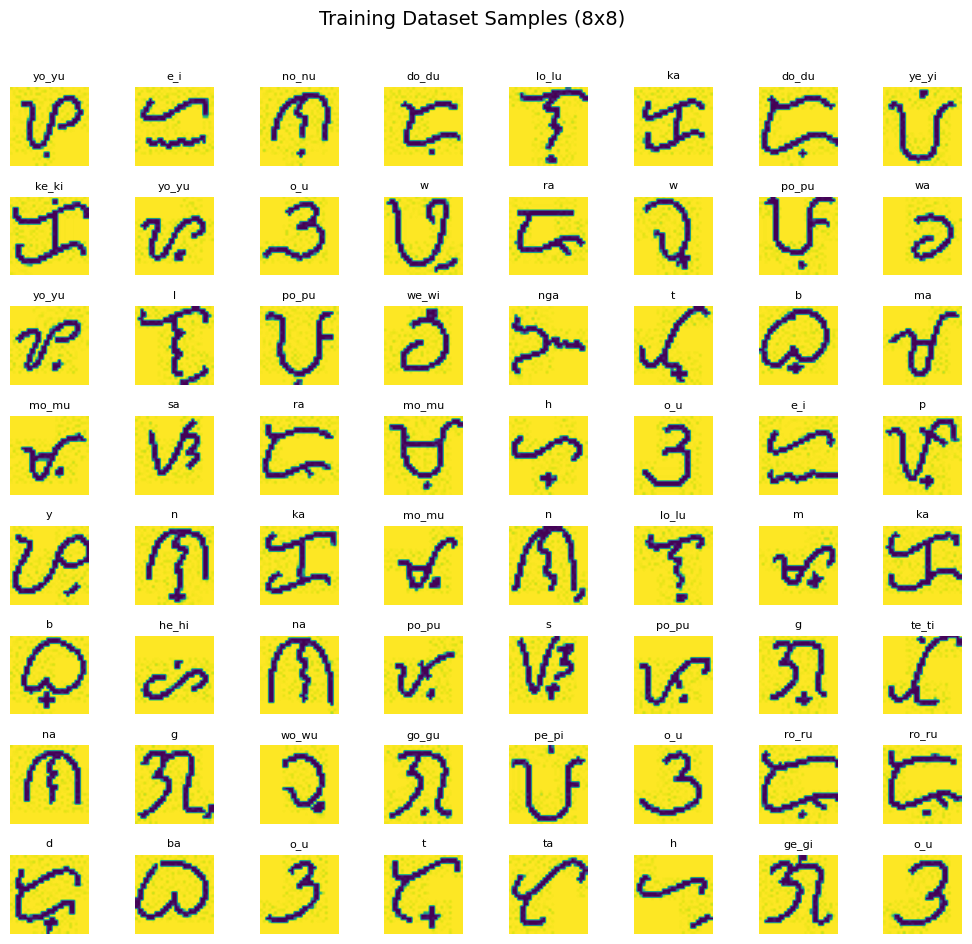

In [26]:
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

# Create a reverse lookup for class indices
labels = {v: k for k, v in train_generator.class_indices.items()}

for i, ax in enumerate(axes.flat):
    # Get a batch from the generator
    batch_images, batch_labels = next(train_generator)
    
    # Pick a random image from the batch
    rand_img_idx = np.random.randint(0, batch_images.shape[0])

    image_disp = batch_images[rand_img_idx].reshape((28, 28))
    label_index = np.argmax(batch_labels[rand_img_idx])
    label = labels[label_index]

    ax.imshow(image_disp)
    ax.set_title(label, fontsize=8)
    ax.set_axis_off()

fig.suptitle("Training Dataset Samples (8x8)", fontsize=14)
plt.show()


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


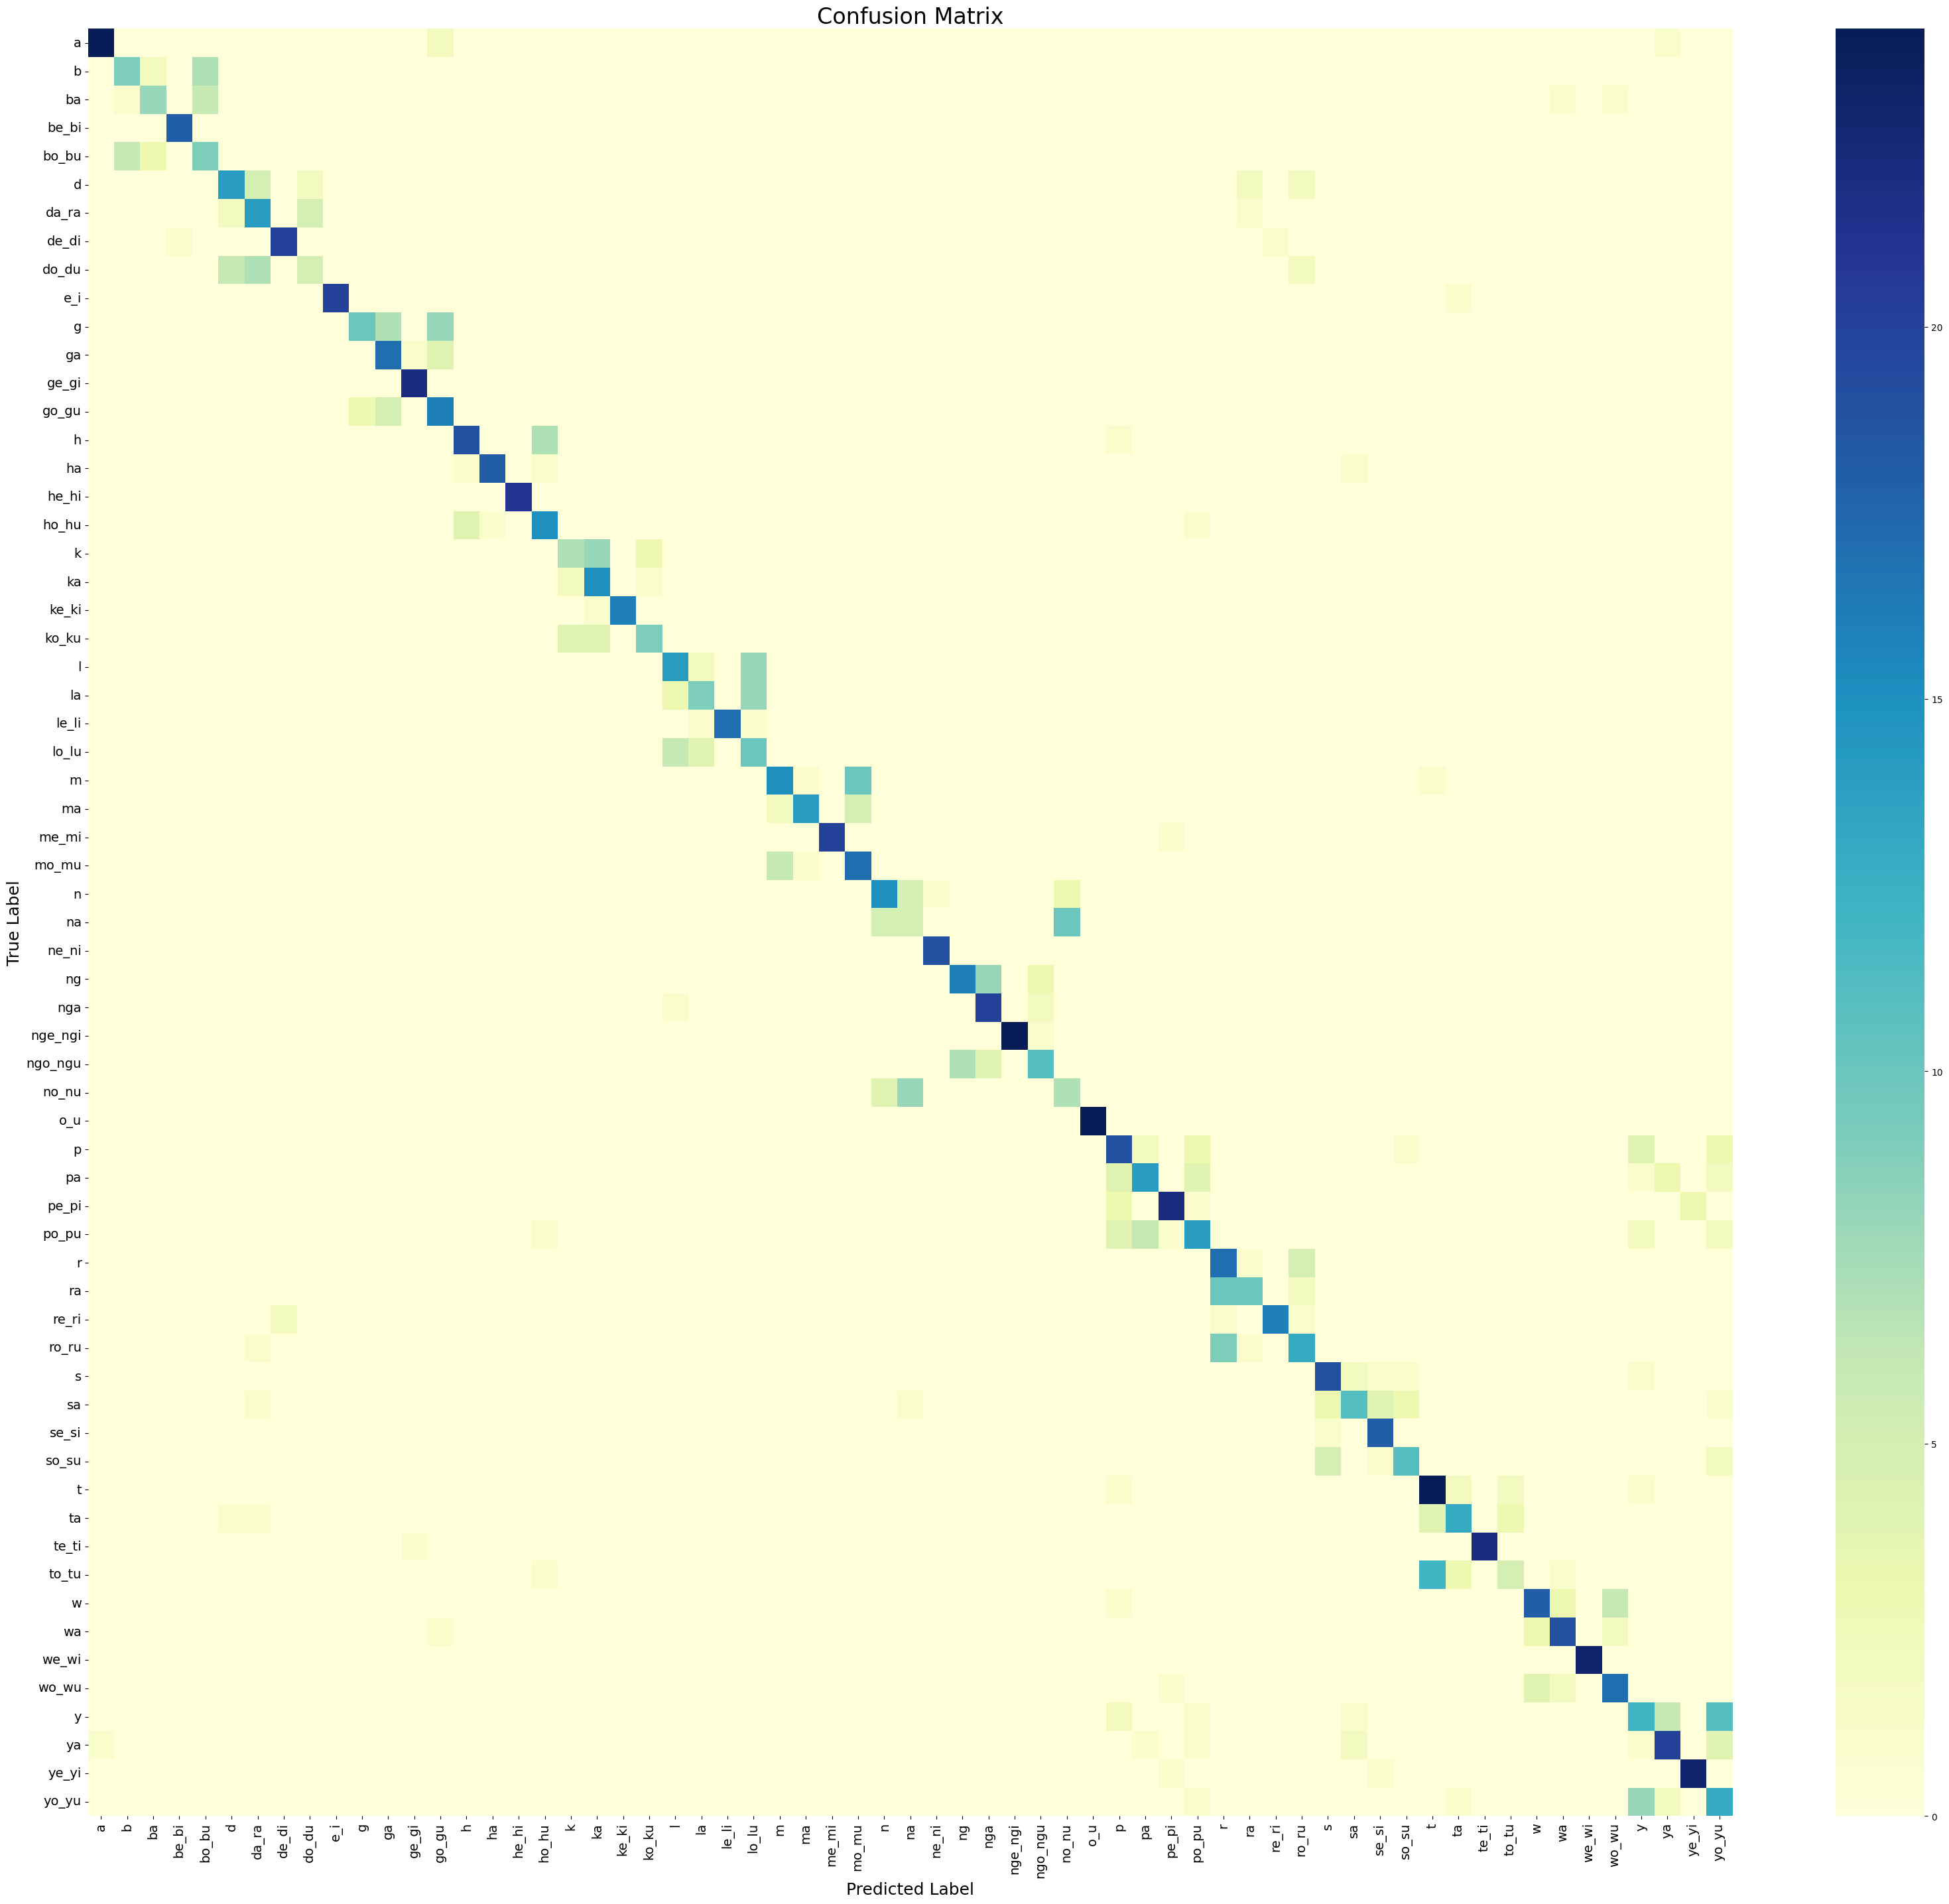

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_true, y_pred, and labels
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true labels
y_true = val_generator.classes

labels = list(train_generator.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(40, 35))  # 🔥 increase this size to make it cleaner (30x25 for example)
sns.heatmap(cm, annot=False, fmt='d', cmap='YlGnBu',xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix", fontsize=24)
plt.xlabel("Predicted Label", fontsize=18)
plt.ylabel("True Label", fontsize=18)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
plt.show()